<a href="https://colab.research.google.com/github/joke3547/Apple_Quality/blob/main/Apple_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
from google.colab import drive

# 授權連接到 Google Drive
drive.mount('/content/drive')

# 載入資料
rawdata_path = '/content/drive/MyDrive/AIA_Exercise/house-prices-advanced-regression-techniques/train.csv'  # 資料在 Google Drive 的路徑
rawdata = pd.read_csv(rawdata_path)  # 假設使用 pandas 讀取 CSV 檔案

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
rawdata

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [ ]:
# 刪除第一個欄位(id資訊)
data1 = rawdata.drop(rawdata.columns[0], axis=1)

# 刪除最後一筆資料(無意義資料)
data2 = data1.drop(data1.index[-1])

data2

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,bad
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   object 
 7   Quality      4000 non-null   object 
dtypes: float64(6), object(2)
memory usage: 250.1+ KB


In [ ]:
data2['Acidity'] = data2['Acidity'].astype(float) # "Acidity" 應該為數值型資料
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Quality      4000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 250.1+ KB


In [ ]:
data2.isnull().sum()

Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [ ]:
data2_num = data2.select_dtypes(include = ['float64', 'int64'])
data2_num.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984


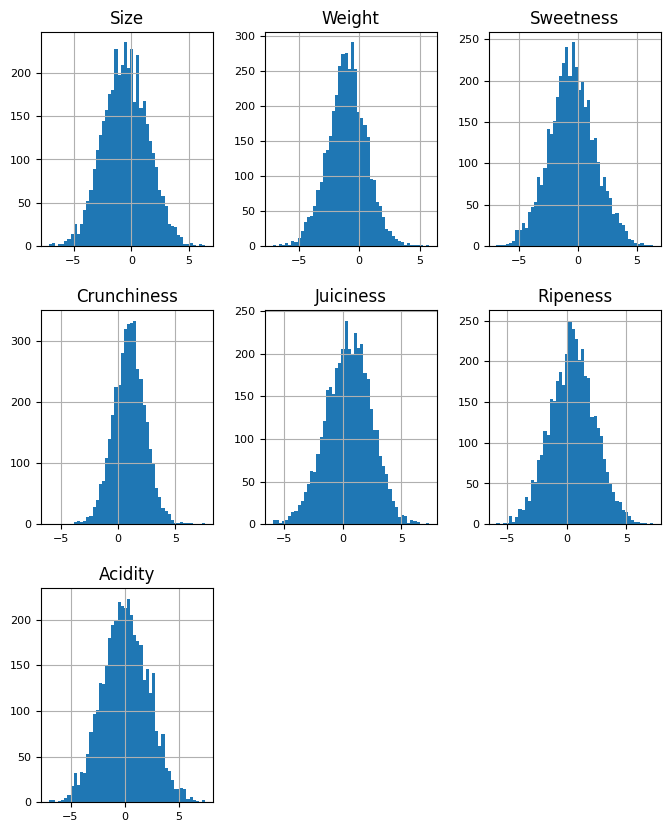

In [ ]:
data2_num.hist(figsize=(8, 10), bins=50, xlabelsize=8, ylabelsize=8); # 長條圖呈現各屬性皆成常態分布

In [ ]:
compare=data2['Quality'].value_counts() # 2004跟1996差不多屬於平衡資料
compare

good    2004
bad     1996
Name: Quality, dtype: int64

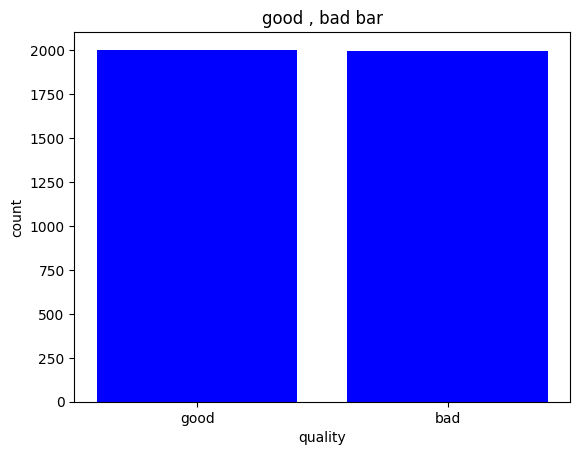

In [ ]:
import matplotlib.pyplot as plt
# Create a bar plot
plt.bar(compare.index, compare, color='blue')

# Add labels and title
plt.xlabel('quality')
plt.ylabel('count')
plt.title('good , bad bar')

# Show the plot
plt.show()

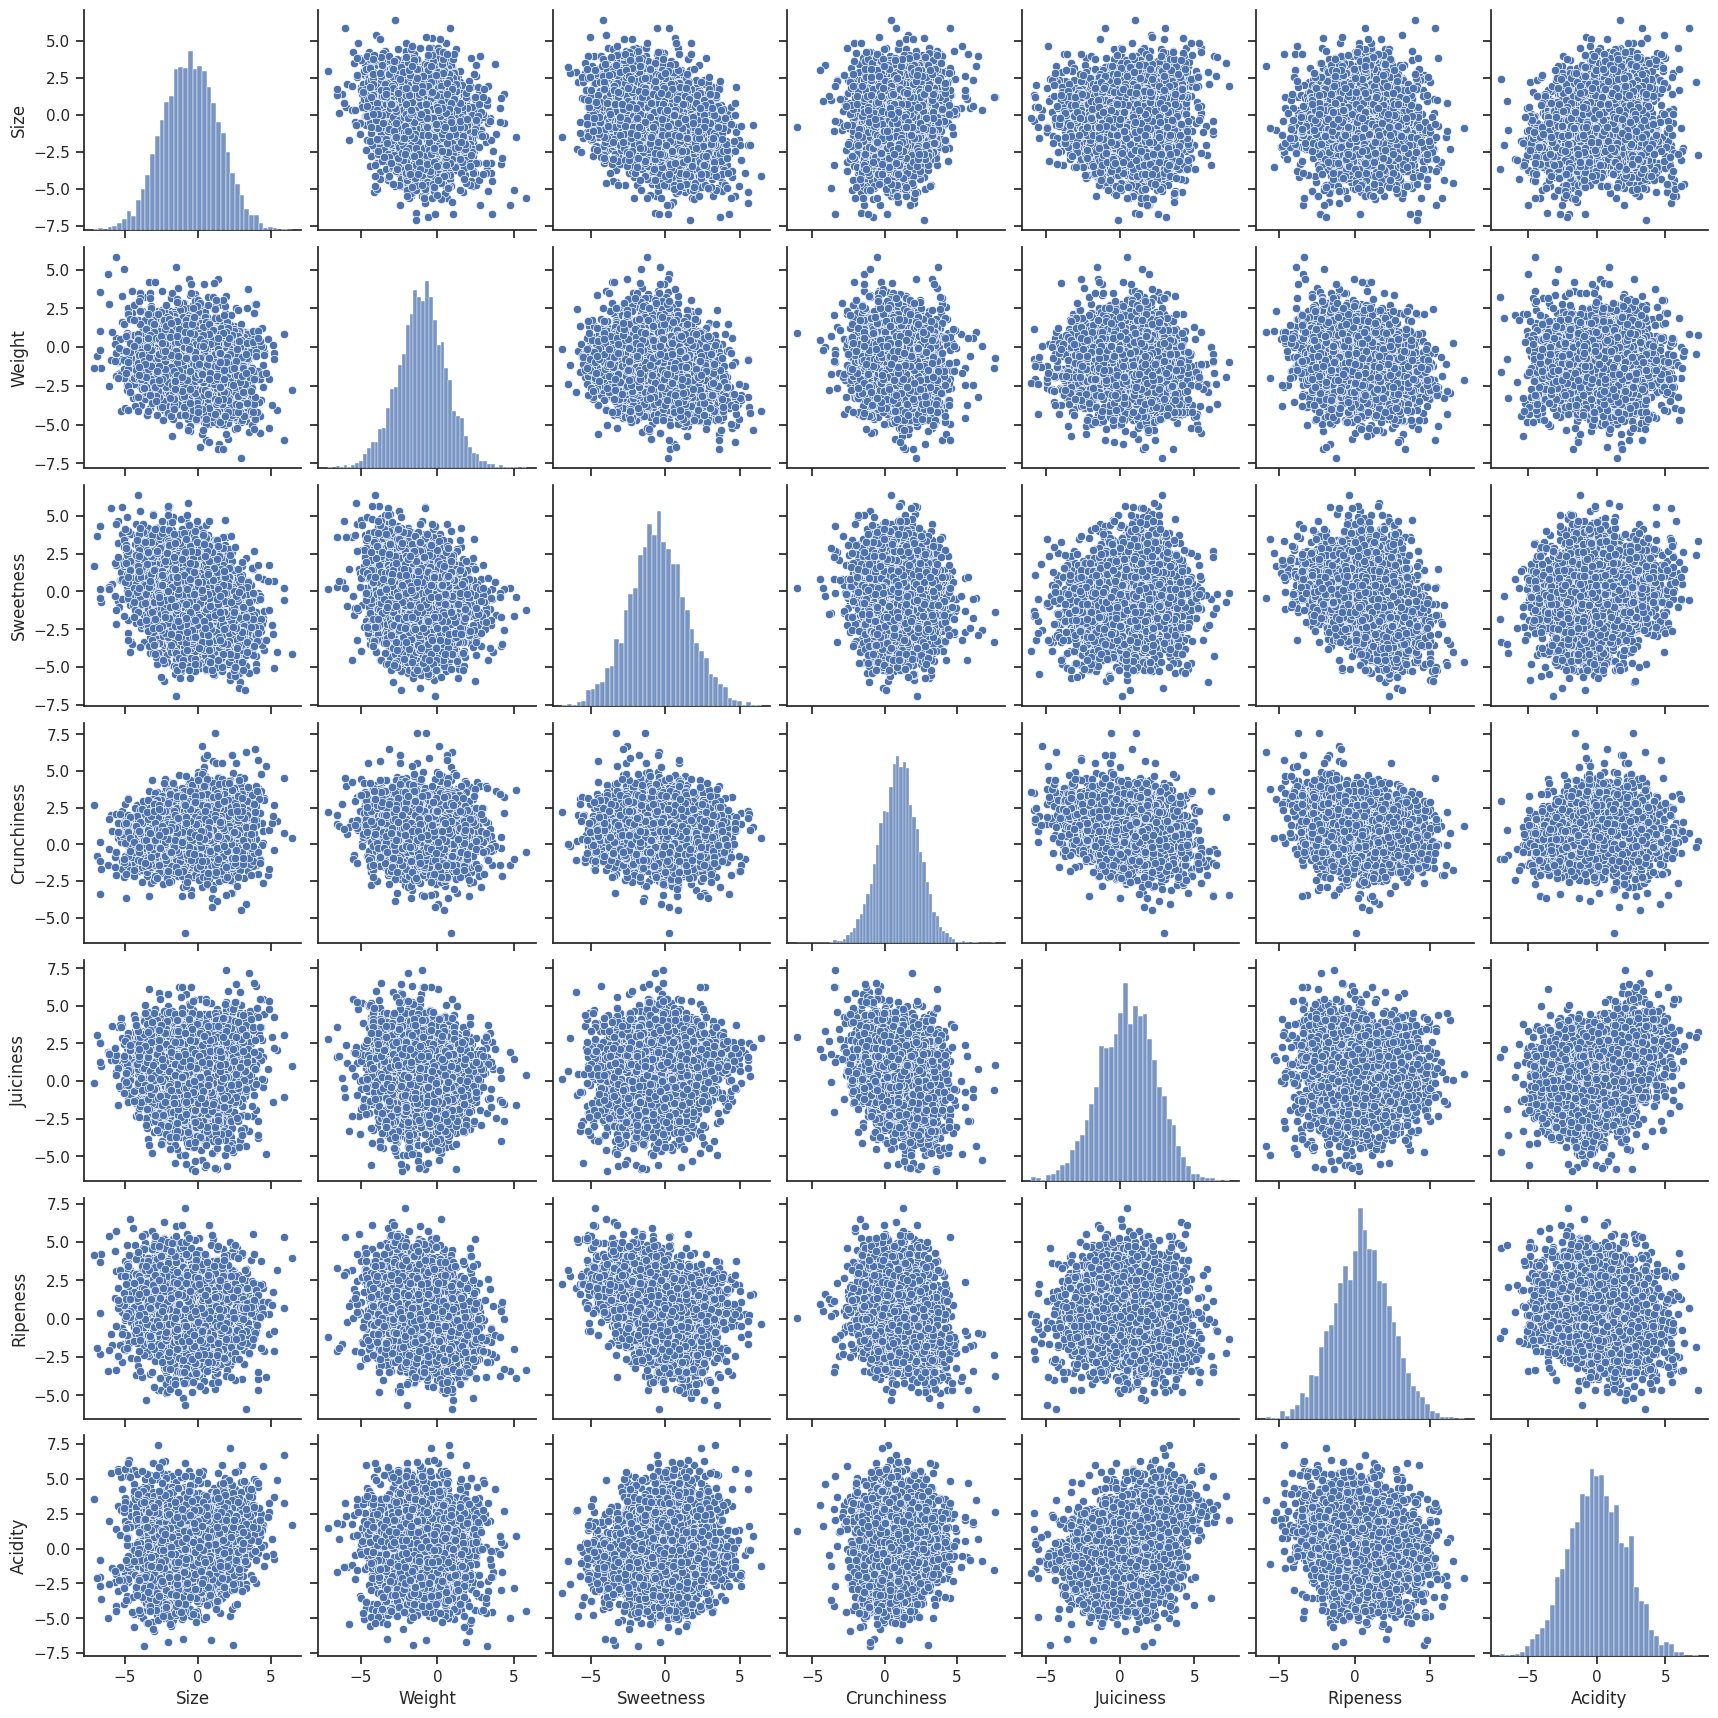

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# 假設 data 是你的資料框架，每個屬性是不同的列
# 這裡使用 pandas 的 melt 函式將資料框架轉換為長格式，方便繪製散布圖
sns.set(style="ticks")
sns.pairplot(data2)

# 顯示圖形
plt.show()

In [ ]:
# 將target欄位資料轉換成[1,0]才能跑機器學習模型
data2['Quality'] = data2['Quality'].replace({'bad': 0, 'good': 1})
data2

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,0
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,1
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,0
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,1


# ***Hint***


> 一些機器學習演算法可能會對異常值（outliers）具有一定的韌性，但有些則可能對異常值敏感。下面我們來討論一下：

> 對異常值具有韌性的演算法：
  決策樹和隨機森林：這些演算法對異常值相對韌性較高，因為它們將資料空間分割成多個區域，並且對於每個區域中的樣本，它們都能單獨進行預測。
  K-最近鄰（KNN）：KNN 演算法基於鄰近樣本的標籤進行預測，對於異常值的影響較小，因為異常值的鄰近樣本往往較少。
  對異常值敏感的演算法：

 線性模型：
  像線性迴歸和邏輯迴歸這樣的模型對異常值比較敏感，因為它們試圖在資料中找到一個最佳的擬合直線或平面，而異常值可能會對這個擬合造成影響。
  支持向量機（SVM）：SVM 在找尋最佳的分離超平面時會將較大的重要性賦予支持向量，而異常值可能會成為支持向量，從而影響模型的擬合。
  在實際應用中，有時你可能會希望排除或調整異常值以改善模型的性能。你可以通過以下方式來處理異常值：

 刪除異常值：
  直接從資料集中刪除異常值。但要小心，刪除異常值可能會導致資料損失，並且可能不適用於所有情況。
  替換異常值：將異常值替換為資料集中的其他值，例如中位數、平均值或者最接近的正常值。
使用韌性損失函數：一些損失函數（如 Huber 損失）對異常值具有一定的韌性，可以在訓練過程中減少異常值的影響。
最終，對於是否排除或忽略異常值，需要根據資料的特性、應用場景以及模型的特點來進行評估和決策。

預測分類問題的模型選擇取決於數據的特性、問題的要求以及其他因素。以下是一些常用於預測分類問題的模型：



1.   羅吉斯迴歸（Logistic Regression）
1.   支持向量機（Support Vector Machine，SVM）
2.   決策樹（Decision Tree）
3.   隨機森林（Random Forest）
4.   梯度提升樹（Gradient Boosting Tree）
5.   深度學習模型（Deep Learning Models）

這些模型中的每一個都有其優點和局限性，因此在選擇模型時，需要考慮問題的特性、數據的大小和質量、計算資源等因素。通常，建議通過交叉驗證和比較不同模型的表現來確定最適合問題的模型。

# ***邏輯回歸模型***

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
# 假設 data 是你的資料框架，其中包含特徵和目標欄位
X = data2.drop(columns=['Quality'])  # 特徵欄位
y = data2['Quality']  # 目標欄位
# 分割資料為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 建立邏輯回歸模型
model = LogisticRegression()
# 在訓練集上訓練模型
model.fit(X_train, y_train)
# 在測試集上進行預測
y_pred = model.predict(X_test)
# 計算模型準確度
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# 計算混淆矩陣
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.75375
Confusion Matrix:
[[303  98]
 [ 99 300]]


# ***SVM模型***

In [ ]:
from sklearn.svm import SVC
# 假設 X 是特徵資料，y 是目標變量
# 分割資料為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 建立支持向量機模型
model = SVC()
# 在訓練集上訓練模型
model.fit(X_train, y_train)
# 在測試集上進行預測
y_pred = model.predict(X_test)
# 計算模型的準確度
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# 計算混淆矩陣
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9075
Confusion Matrix:
[[362  39]
 [ 35 364]]


# ***決策樹模型***

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
# 假設 X 是特徵資料，y 是目標變量
# 分割資料為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 建立決策樹模型
model = DecisionTreeClassifier() # max_depth = n 調整樹深度增加可解釋性,不過效能會變差
# 在訓練集上訓練模型
model.fit(X_train, y_train)
# 在測試集上進行預測
y_pred = model.predict(X_test)
# 計算模型的準確度
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# 計算混淆矩陣
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
# 將決策樹結果以圖形形式呈現
#plt.figure(figsize=(20,10))
#tree.plot_tree(model, filled=True, feature_names=X.columns, class_names=True)
#plt.show()

Accuracy: 0.81
Confusion Matrix:
[[322  79]
 [ 73 326]]


# ***隨機森林模型***

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# 假設 X 是特徵資料，y 是目標變量
# 分割資料為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 建立隨機森林模型
model = RandomForestClassifier()
# 在訓練集上訓練模型
model.fit(X_train, y_train)
# 在測試集上進行預測
y_pred = model.predict(X_test)
# 計算模型的準確度
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# 計算混淆矩陣
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.89875
Confusion Matrix:
[[359  42]
 [ 39 360]]


# ***梯度提升樹模型***

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# 假設 X 是特徵資料，y 是目標變量
# 分割資料為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 建立隨機森林模型
model = GradientBoostingClassifier()
# 在訓練集上訓練模型
model.fit(X_train, y_train)
# 在測試集上進行預測
y_pred = model.predict(X_test)
# 計算模型的準確度
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# 計算混淆矩陣
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.87
Confusion Matrix:
[[349  52]
 [ 52 347]]
